# RAG 구조

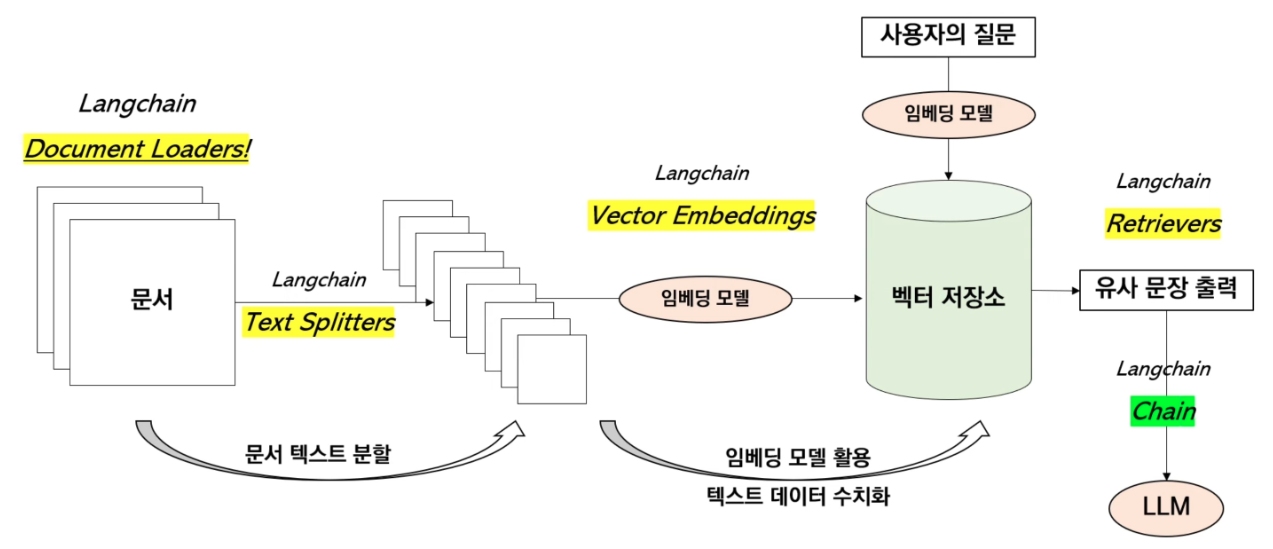

# Setup

## 참고문서
- https://wikidocs.net/book/14314
- https://wikidocs.net/book/14473

## OpenAI Key 등록
- [OpenAI Key 발급](https://platform.openai.com/api-keys)
- [OpenAI 요금](https://openai.com/api/pricing/)

In [ ]:
import os

os.environ['OPENAI_API_KEY'] = '생성한 키 입력'

## 구글 드라이브 연결

In [ ]:
# 구글 드라이브 연결(데이터 로드를 위해서)
try:
    from google.colab import drive

    drive.mount('/content/data')
    DATA_PATH = "/content/data/MyDrive/ai_lecture/3. Large Language Models/data/"
except:
    DATA_PATH = "./data/"

Mounted at /content/data


## install

In [ ]:
!pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
!pip install -U langchain langchain-community langchain-experimental langchain-core langchain-openai langsmith langchainhub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.8/289.8 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.1/374.1 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/

# Document Loader

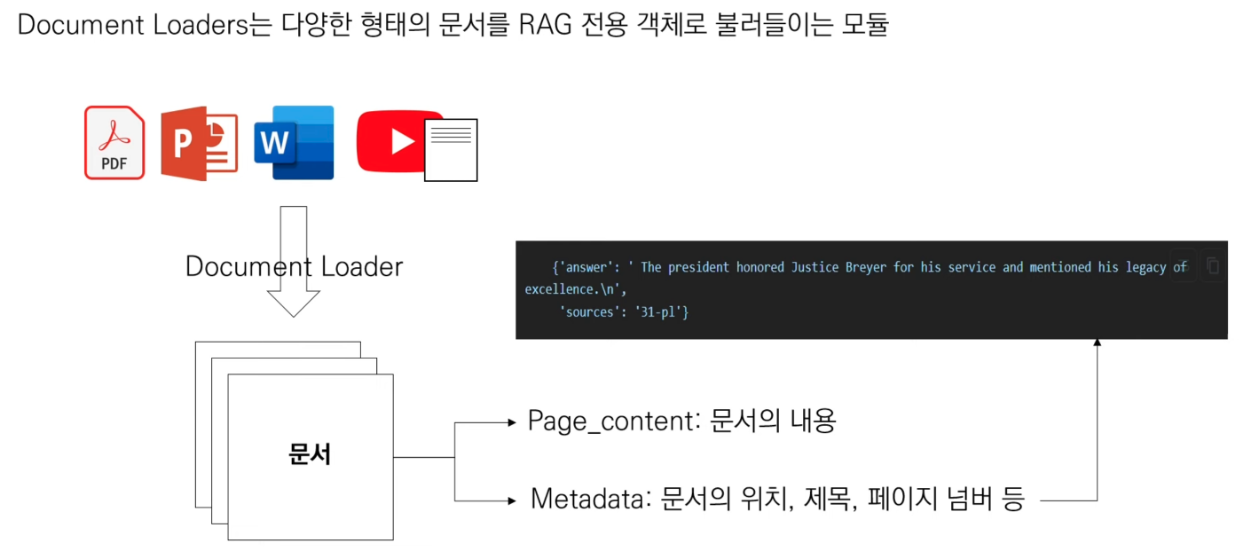

LangChain에서 Document Loader는 다양한 소스에서 문서를 불러오고 처리하는 과정을 담당합니다. 특히 사전지식이 필요한 지식 기반의 태스크, 정보 검색, 데이터 처리 작업 등을 처리할 때 반드시 필요합니다. Document Loader의 주요 목적은 효율적으로 문서 데이터를 수집하고, 사용 가능한 형식으로 변환하는 것입니다.
1. `다양한 소스 지원`: 웹 페이지, PDF 파일, 데이터베이스 등 다양한 소스에서 문서를 불러올 수 있습니다.
2. `데이터 변환 및 정제`: 불러온 문서 데이터를 분석하고 처리하여, 랭체인의 다른 모듈이나 알고리즘이 처리하기 쉬운 형태로 변환합니다. 불필요한 데이터를 제거하거나, 구조를 변경할 수도 있습니다.
3. `효율적인 데이터 관리`: 대량의 문서 데이터를 효율적으로 관리하고, 필요할 때 쉽게 접근할 수 있도록 합니다. 이를 통해 검색 속도를 향상시키고, 전체 시스템의 성능을 높일 수 있습니다.

사용 예시:
- 웹 크롤링을 통해 특정 주제에 관한 기사나 논문을 자동으로 수집하고, 이를 분석하여 요약 정보를 생성하는 애플리케이션.
- 기업 내부 문서 저장소에서 필요한 문서를 빠르게 검색하고, 관련 정보를 추출하여 보고서를 자동으로 작성하는 시스템.

## 웹 문서 (WebBaseLoader)

- `WebBaseLoader`는 특정 웹 페이지의 내용을 로드하고 파싱하기 위해 설계된 클래스입니다.
- `web_paths` 매개변수는 로드할 웹 페이지의 URL을 단일 문자열 또는 여러 개의 URL을 시퀀스 배열로 지정할 수 있습니다. 여기서는 파이썬 투플(tuple) 형태로 2개의 URL을 사용하고 있습니다.
- `bs_kwargs` 매개변수는 BeautifulSoup을 사용하여 HTML을 파싱할 때 사용되는 인자들을 딕셔너리 형태로 제공합니다.
- 예제에서는 `bs4.SoupStrainer`를 사용하여 특정 클래스 이름을 가진 HTML 요소만 파싱하도록 지정하고 있습니다. `"article-header"`, `"article-title"` 클래스를 가진 요소만 선택하여 파싱합니다.

In [ ]:
import bs4
from langchain_community.document_loaders import WebBaseLoader

In [ ]:
# 여러 개의 url 지정 가능
url1 = "https://blog.langchain.dev/week-of-1-22-24-langchain-release-notes/"
url2 = "https://blog.langchain.dev/week-of-2-5-24-langchain-release-notes/"

In [ ]:
loader = WebBaseLoader(
    web_paths=(url1, url2),
    bs_kwargs=dict(
        parse_only=bs4.SoupStrainer(
            class_=("article-header", "article-content")
        )
    ),
)

In [ ]:
docs = loader.load()
len(docs)

2

In [ ]:
docs[0]

Document(metadata={'source': 'https://blog.langchain.dev/week-of-1-22-24-langchain-release-notes/'}, page_content='')

## 텍스트 문서 (TextLoader)
- `TextLoader`를 사용하여 텍스트 파일을 불러올 수 있습니다. 그리고 텍스트 파일의 내용을 랭체인의 Document 객체로 변환하고 이를 리스트 형태로 반환합니다.

In [ ]:
from langchain_community.document_loaders import TextLoader

In [ ]:
loader = TextLoader(DATA_PATH+'history.txt')
data = loader.load()

print(type(data))
print(len(data))

<class 'list'>
1


- Document 객체에는 `page_content` 필드와 `metadata` 필드가 들어 있습니다.
- `page_content` 는 텍스트로 변환된 문자열이 들어 있고, 리스트의 첫 번째 Document 객체의 문자열의 개수는 1234글자입니다.

In [ ]:
len(data[0].page_content)

1234

- Document 객체의 `metadata` 속성에는 원본 파일에 대한 메타데이터가 들어 있습니다. 원본 파일의 경로를 확인할 수 있습니다.

In [ ]:
data[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/history.txt'}

- 다음 출력 결과를 보면 리스트 배열 안에 Document 객체가 담겨 있는 것을 볼 수 있습니다.

In [ ]:
data

[Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/history.txt'}, page_content='한국의 역사는 수천 년에 걸쳐 이어져 온 긴 여정 속에서 다양한 문화와 전통이 형성되고 발전해 왔습니다. 고조선에서 시작해 삼국 시대의 경쟁, 그리고 통일 신라와 고려를 거쳐 조선까지, 한반도는 많은 변화를 겪었습니다.\n\n고조선은 기원전 2333년 단군왕검에 의해 세워졌다고 전해집니다. 이는 한국 역사상 최초의 국가로, 한민족의 시원이라 할 수 있습니다. 이후 기원전 1세기경에는 한반도와 만주 일대에서 여러 소국이 성장하며 삼한 시대로 접어듭니다.\n\n4세기경, 고구려, 백제, 신라의 삼국이 한반도의 주요 세력으로 부상했습니다. 이 시기는 삼국이 각각 문화와 기술, 무력을 발전시키며 경쟁적으로 성장한 시기로, 한국 역사에서 중요한 전환점을 마련했습니다. 특히 고구려는 북방의 강대국으로 성장하여 중국과도 여러 차례 전쟁을 벌였습니다.\n\n7세기 말, 신라는 당나라와 연합하여 백제와 고구려를 차례로 정복하고, 한반도 최초의 통일 국가인 통일 신라를 건립합니다. 이 시기에 신라는 불교를 국교로 채택하며 문화와 예술이 크게 발전했습니다.\n\n그러나 10세기에 이르러 신라는 내부의 분열과 외부의 압력으로 쇠퇴하고, 이를 대체하여 고려가 성립됩니다. 고려 시대에는 과거제도의 도입과 더불어 청자 등 고려 고유의 문화가 꽃피었습니다.\n\n조선은 1392년 이성계에 의해 건국되어, 1910년까지 이어졌습니다. 조선 초기에는 세종대왕이 한글을 창제하여 백성들의 문해율을 높이는 등 문화적, 과학적 성취가 이루어졌습니다. 그러나 조선 후기에는 내부적으로 실학의 발전과 함께 사회적 변화가 모색되었으나, 외부로부터의 압력은 점차 커져만 갔습니다.\n\n19세기 말부터 20세기 초에 걸쳐 한국은 제국주의 열강의 침략을 받으며 많은 시련을 겪었습니다. 1910년

## 디렉토리 폴더 (DirectoryLoader)
- `DirectoryLoader`를 사용하여 디렉토리 내의 모든 문서를 로드할 수 있습니다.
- `DirectoryLoader` 인스턴스를 생성할 때 문서가 있는 디렉토리의 경로와 해당 문서를 식별할 수 있는 glob 패턴을 지정합니다.
- 이 때 문서를 읽고 처리하기 위해서 `UnstructuredLoader` 가 내부적으로 사용됩니다. PDF, XML, HTML 등 미리 정의된 형식이 없는 텍스트 문서를 전처리하고 구조화된 형식으로 변환합니다.

이 Loader를 사용하려면 `unstructured 라이브러리`가 설치되어 있어야 합니다.

In [ ]:
!pip install unstructured

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.7/274.7 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 9.9 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=3b37942658f78d3821d359ff13f4c1ebb88f4d6942a735cd80d9d26ec903a682
  Sto

In [ ]:
import os
from glob import glob

files = glob(os.path.join(DATA_PATH, '*.txt'))
files

['/content/data/MyDrive/ai_lecture/3. Large Language Models/data/news.txt',
 '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/history.txt']

- 이와 같은 작업을 `langchain_community.document_loaders`의 `DirectoryLoader` 클래스를 사용하여 수행할 수 있습니다. `DirectoryLoader`는 지정된 경로와 glob 패턴에 맞는 파일을 찾아서 로드합니다.
- `len(data)`는 로드된 데이터의 길이, 즉 `.txt 파일`의 개수를 반환합니다. 이는 `DirectoryLoader`가 지정된 패턴에 맞는 모든 파일을 로드하고, 각 파일의 내용을 리스트의 각 항목으로 저장하기 때문입니다.

In [ ]:
from langchain_community.document_loaders import DirectoryLoader

loader = DirectoryLoader(path=DATA_PATH, glob='*.txt')

data = loader.load()
len(data)

2

- 2개의 `.txt 파일`이 각각 `Document` 객체로 변환됩니다. 이 중에서 첫 번째 문서 객체를 출력하여 내용을 확인해 봅니다.

In [ ]:
data[0]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/news.txt'}, page_content='제목:\n\nAI2, 상업 활용까지 자유로운 \'진짜\' 오픈 소스 LLM \'올모\' 출시\n\n내용:\n\n앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) \'올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.\n\n벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다.\n\n이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다.\n\n올모 프레임워크는 70억 매개변수의 ‘올모 7B’ 등 4가지 변형 모델과 10억 매개변수의 ‘올모 1B’ 모델을 제공한다. 모델들은 훈련 데이터를 생성하는 코드를 포함해 사전 훈련을 위한 3조개의 토큰 공개 코퍼스를 특징으로 하는 AI2의 ‘돌마(Dolma)’ 데이터 세트를 기반으로 구축됐다.\n\n프레임워크에는 추론 코드, 훈련 지표 및 훈련 로그와 함께 최소 2조개의 토큰으로 훈련된 모델에 대한 전체 모델 가중치가 포함된다. 또 개발에 사용된 평가 제품군도 포함돼 있으며, 평가 제품군은 훈련 과정 중 1000단계마다 모델당 500개 이상의 체크포인트로 구성된다.\n\n또 아파치 2.0 라이선스에 따라 상업적 활용에 제한이 없다.\n\n이와 관련, 카네기 멜론대학교는 지난달 "빅테크의 오픈 소스 AI는 사실상 상업용 모델"이라며 "빅테크의 마케팅이나 규제회피 용도로 오픈 소스라는 단어를 활용한다"라고 비난

## CSV 문서 (CSVLoader)
- `CSVLoader` 클래스를 사용하여 CSV 파일에서 데이터를 로드합니다.
- CSV 파일의 각 행을 추출하여 서로 다른 Document 객체로 변환합니다. 이들 문서 객체로 이루어진 리스트 형태로 반환합니다.

In [ ]:
from langchain_community.document_loaders.csv_loader import CSVLoader

loader = CSVLoader(file_path=DATA_PATH+'한국주택금융공사_주택금융관련_지수_20160101.csv', encoding='cp949')
data = loader.load()

len(data)

143

- 다음 출력 결과를 보면 리스트 배열 안에 Document 객체가 담겨 있는 것을 볼 수 있습니다. Document 객체의 `metadata` 속성을 통해 `원본 파일의 출처('source')`와 `행 번호('row')`를 확인할 수 있습니다.

In [ ]:
data[0]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/한국주택금융공사_주택금융관련_지수_20160101.csv', 'row': 0}, page_content='연도: 2004-01-01\n전국소득대비 주택가격 비율: 4.21\n서울소득대비 주택가격 비율: 4.89\n부산소득대비 주택가격 비율: 3.95\n대구소득대비 주택가격 비율: 3.73\n인천소득대비 주택가격 비율: 4.65\n광주소득대비 주택가격 비율: 2.81\n대전소득대비 주택가격 비율: 4.68\n울산소득대비 주택가격 비율: 2.66\n세종소득대비 주택가격 비율: 0\n경기소득대비 주택가격 비율: 4.17\n강원소득대비 주택가격 비율: 2.49\n충북소득대비 주택가격 비율: 2.62\n충남소득대비 주택가격 비율: 2.17\n전북소득대비 주택가격 비율: 3.12\n전남소득대비 주택가격 비율: 2.12\n경북소득대비 주택가격 비율: 2.12\n경남소득대비 주택가격 비율: 3.81\n제주소득대비 주택가격 비율: 2.99\n전국평균 대출금액  평균 연소득: 2.36\n서울평균 대출금액  평균 연소득: 2.61\n부산평균 대출금액  평균 연소득: 2.35\n대구평균 대출금액  평균 연소득: 2.24\n인천평균 대출금액  평균 연소득: 2.7\n광주평균 대출금액  평균 연소득: 1.6\n대전평균 대출금액  평균 연소득: 2.26\n울산평균 대출금액  평균 연소득: 1.67\n세종평균 대출금액  평균 연소득: 0\n경기평균 대출금액  평균 연소득: 2.42\n강원평균 대출금액  평균 연소득: 1.44\n충북평균 대출금액  평균 연소득: 1.53\n충남평균 대출금액  평균 연소득: 1.21\n전북평균 대출금액  평균 연소득: 1.9\n전남평균 대출금액  평균 연소득: 1.42\n경북평균 대출금액  평균 연소득: 1.31\n경남평균 대출금액  평균 연소득:

### 데이터 출처 정보를 특정 필드(열, column)로 지정
- `CSVLoader`를 사용하여 CSV 파일을 로드할 때, `source_column 속성`에 데이터의 `출처 정보('source')`로 사용될 열의 이름을 지정할 수 있습니다.

다음 예제에서는 '연도' 열이 각 행 데이터의 출처 정보로 사용됩니다. `'source' 속성`을 확인해 보면 '2004-01-01' 와 같이 해당 행의 '연도' 열에 있는 값이 적용된 것을 알 수 있습니다.

In [ ]:
loader = CSVLoader(file_path=DATA_PATH+'한국주택금융공사_주택금융관련_지수_20160101.csv', encoding='cp949',
                   source_column='연도')
data = loader.load()

data[0]

Document(metadata={'source': '2004-01-01', 'row': 0}, page_content='연도: 2004-01-01\n전국소득대비 주택가격 비율: 4.21\n서울소득대비 주택가격 비율: 4.89\n부산소득대비 주택가격 비율: 3.95\n대구소득대비 주택가격 비율: 3.73\n인천소득대비 주택가격 비율: 4.65\n광주소득대비 주택가격 비율: 2.81\n대전소득대비 주택가격 비율: 4.68\n울산소득대비 주택가격 비율: 2.66\n세종소득대비 주택가격 비율: 0\n경기소득대비 주택가격 비율: 4.17\n강원소득대비 주택가격 비율: 2.49\n충북소득대비 주택가격 비율: 2.62\n충남소득대비 주택가격 비율: 2.17\n전북소득대비 주택가격 비율: 3.12\n전남소득대비 주택가격 비율: 2.12\n경북소득대비 주택가격 비율: 2.12\n경남소득대비 주택가격 비율: 3.81\n제주소득대비 주택가격 비율: 2.99\n전국평균 대출금액  평균 연소득: 2.36\n서울평균 대출금액  평균 연소득: 2.61\n부산평균 대출금액  평균 연소득: 2.35\n대구평균 대출금액  평균 연소득: 2.24\n인천평균 대출금액  평균 연소득: 2.7\n광주평균 대출금액  평균 연소득: 1.6\n대전평균 대출금액  평균 연소득: 2.26\n울산평균 대출금액  평균 연소득: 1.67\n세종평균 대출금액  평균 연소득: 0\n경기평균 대출금액  평균 연소득: 2.42\n강원평균 대출금액  평균 연소득: 1.44\n충북평균 대출금액  평균 연소득: 1.53\n충남평균 대출금액  평균 연소득: 1.21\n전북평균 대출금액  평균 연소득: 1.9\n전남평균 대출금액  평균 연소득: 1.42\n경북평균 대출금액  평균 연소득: 1.31\n경남평균 대출금액  평균 연소득: 2.06\n제주평균 대출금액  평균 연소득: 1.28')

### CSV 파싱 옵션을 지정
- `CSVLoader` 클래스를 사용할 때 추가적인 CSV 관련 설정을 csv_args 매개변수를 통해 지정할 수 있습니다.
- `csv_args`는 파이썬 표준 라이브러리인 csv 모듈에 전달될 추가 인자들을 담는 딕셔너리입니다.

다음 예제는 CSV 파일의 구분자('delimiter')로 줄바꿈 문자('\n')를 지정하고 있습니다. 줄바꿈 문자를 기준으로 각 필드를 구분하기 때문에, 기본 값인 콤마(',')를 적용했을 경우와 파싱된 결과에 차이가 있습니다.

In [ ]:
loader = CSVLoader(file_path=DATA_PATH+'한국주택금융공사_주택금융관련_지수_20160101.csv', encoding='cp949',
                   csv_args={
                       'delimiter': '\n',
                   })
data = loader.load()

data[0]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/한국주택금융공사_주택금융관련_지수_20160101.csv', 'row': 0}, page_content='연도,전국소득대비 주택가격 비율,서울소득대비 주택가격 비율,부산소득대비 주택가격 비율,대구소득대비 주택가격 비율,인천소득대비 주택가격 비율,광주소득대비 주택가격 비율,대전소득대비 주택가격 비율,울산소득대비 주택가격 비율,세종소득대비 주택가격 비율,경기소득대비 주택가격 비율,강원소득대비 주택가격 비율,충북소득대비 주택가격 비율,충남소득대비 주택가격 비율,전북소득대비 주택가격 비율,전남소득대비 주택가격 비율,경북소득대비 주택가격 비율,경남소득대비 주택가격 비율,제주소득대비 주택가격 비율,전국평균 대출금액  평균 연소득,서울평균 대출금액  평균 연소득,부산평균 대출금액  평균 연소득,대구평균 대출금액  평균 연소득,인천평균 대출금액  평균 연소득,광주평균 대출금액  평균 연소득,대전평균 대출금액  평균 연소득,울산평균 대출금액  평균 연소득,세종평균 대출금액  평균 연소득,경기평균 대출금액  평균 연소득,강원평균 대출금액  평균 연소득,충북평균 대출금액  평균 연소득,충남평균 대출금액  평균 연소득,전북평균 대출금액  평균 연소득,전남평균 대출금액  평균 연소득,경북평균 대출금액  평균 연소득,경남평균 대출금액  평균 연소득,제주평균 대출금액  평균 연소득: 2004-01-01,4.21,4.89,3.95,3.73,4.65,2.81,4.68,2.66,0,4.17,2.49,2.62,2.17,3.12,2.12,2.12,3.81,2.99,2.36,2.61,2.35,2.24,2.7,1.6,2.26,1.67,0,2.42,1.44,1.53,1.21,1.9,1.42,1.31,2.06,1.28')

## PDF 문서

### PDF 문서 페이지별로 로드 (PyPDFLoader)
- `langchain_community` 패키지에서 제공하는 `PyPDFLoader`를 사용하여 PDF 파일에서 텍스트를 추출합니다. 이 명령을 사용하려면 `pypdf 라이브러리를 먼저 설치`해야 합니다.

In [ ]:
!pip install -q pypdf

- `PyPDFLoader` 인스턴스를 사용하여 지정된 PDF 파일(2023 SK ESG 보고서)을 열고, `len(pages)`를 통해 변환된 Document 객체의 개수를 계산합니다.

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

pdf_filepath = '000660_SK_2023.pdf'
loader = PyPDFLoader(DATA_PATH+pdf_filepath)
pages = loader.load()

len(pages)

21

- 인덱스 10에 해당하는 Document 객체를 출력해 봅니다.
- `metadata` 속성에는 파일의 출처와 해당 페이지 번호가 포함되어 있습니다.

In [ ]:
pages[10]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 10}, page_content='21 20\nESG Special Report 2023\n투자 검토 단계\nPre-Acquisition (인수 전)\n01포트폴리오 ESG 관리 체계\n장기적 관점에서 기업가치 제고를 실현하기 위해 핵심자산인 \n투자 포트폴리오의 경제적 가치와 함께 ESG 가치를 \n통합적으로 관리하기 위한 체계를 구축하고 있습니다.\n투자 검토 시점부터 인수 후, 회수 시점까지 투자\nLife Cycle에 걸쳐 적용되는 체계적인 ESG 관리를 \n기반으로 내부적으로는 ESG를 고려한 합리적인 투자의사 \n결정을 이행하고, 시장에서는 포트폴리오의 기업가치가 \n시장에서 제대로 평가받으며 나아가 사회·환경에 미치는 \n파급력을 높일 수 있도록 노력하겠습니다.포트폴리오 ESG 관리 원칙\nSK주식회사 투자회사\n기업가치 관점의\nESG 중점관리 \n항목 도출자사 ESG \n관리전략\nESG 성과 \n데이터 관리기업가치와\nESG 성과 \n연계성 분석포트폴리오 \nESG 관리전략 \nUpgrade성장단계\n산업특성\nESG Divestment 전략 검토\n       ESG Exit 리포트 발간\n ·    인수 이후 ESG Value-up 기반 Exit 전략 도출\n ·    중대 ESG 리스크/기회 현황 및   \nESG 관리·공시 수준 확인\n셀사이드(Sell-side) 점검사항 관리\n       중대 ESG 이슈 존재 여부 검토\n ·    매각 대상 시장 내 ESG 규제 준수 여부 확인\n ·    ESG 우수 영역에 대한 정보공개 및    \n기회 확대 방안 제시\n ·    국내외 책임투자 기준 부합 여부 확인\n ·    우수 관리 영역 정보공개 및   \n이해관계자 커뮤니케이션매각/투자 회수 단계\n03\nExit 

### PDF 문서의 메타 데이터를 상세하게 추출 (PyMuPDFLoader)
- `langchain_community.document_loaders` 모듈의 `PyMuPDFLoader` 클래스는 `PyMuPDF`를 사용하여 PDF 파일의 페이지를 로드하고, 각 페이지를 개별 document 객체로 추출합니다.
- 특히 PDF 문서의 자세한 메타데이터를 추출하는 데 강점이 있습니다.

`PyMuPDFLoader` 클래스를 사용하려면, 개발환경에 `PyMuPDF 라이브러리를 설치`합니다.

In [ ]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 123.7 MB/s eta 0:00:00


- `PyMuPDFLoader` 인스턴스를 사용하여 지정된 PDF 파일(2023 SK ESG 보고서)을 로드하면, 각 페이지가 하나의 Document 객체로 일대일로 변환됩니다.
- `len(pages)`를 통해 파일 내 페이지 수를 계산하면 21개의 문서 객체로 변환된 것을 알 수 있습니다.

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

pdf_filepath = '000660_SK_2023.pdf'

loader = PyMuPDFLoader(DATA_PATH+pdf_filepath)
pages = loader.load()

len(pages)

21

- 첫번째 Document `객체의 내용(page_content)`을 출력해서 확인해 봅니다.

In [ ]:
pages[0].page_content

'1\nWhere we are heading    |     How we get there    |     What we are preparing\nESG Special Report\n2023 \nNAVIGATING \nUNCERTAINTIES TO ENSURE  \nSUSTAINABLE \nGROWTH\n'

- 이번에는 첫번째 Document 객체의 `메타데이터(metadata)`를 출력해 봅니다.
- 앞에서 살펴본 로더들과 비교했을 때 훨씬 더 상세한 정보를 담고 있습니다.

In [ ]:
pages[0].metadata

{'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf',
 'file_path': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf',
 'page': 0,
 'total_pages': 21,
 'format': 'PDF 1.6',
 'title': '',
 'author': '',
 'subject': '',
 'keywords': '',
 'creator': 'Adobe InDesign 16.2 (Macintosh)',
 'producer': 'Adobe PDF Library 15.0',
 'creationDate': "D:20230626161631+09'00'",
 'modDate': "D:20230626172106+09'00'",
 'trapped': ''}

### 특정 폴더의 모든 PDF 문서 로드 (PyPDFDirectoryLoader)
- `langchain_community.document_loaders` 모듈의 `PyPDFDirectoryLoader` 클래스는 지정된 디렉토리에서 모든 PDF 문서를 한번에 가져옵니다.
- `'./' 디렉토리`를 사용하여 `PyPDFDirectoryLoader`의 인스턴스를 생성하고, `load` 메소드를 호출하여 해당 디렉토리의 모든 PDF 문서를 로드하고, `data` 변수에 할당합니다.
- `len(data)`는 로드된 문서 객체의 총 개수를 반환합니다.
- `PyPDFDirectoryLoader`가 디렉토리 내의 PDF 파일들을 가져와서 페이지별로 문서 객체로 변환하게 됩니다.

In [ ]:
from langchain_community.document_loaders import PyPDFDirectoryLoader

loader = PyPDFDirectoryLoader(DATA_PATH)
data = loader.load()

len(data)

100

- 첫 번째 문서 객체의 내용을 출력합니다. 한일시멘트 보고서의 첫 페이지에서 변환된 것으로 보입니다.

In [ ]:
data[0]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/000660_SK_2023.pdf', 'page': 0}, page_content='1\nWhere we are heading    |     How we get there    |     What we are preparing\nESG Special Report\n2023 NAVIGATING \nUNCERTAINTIES TO ENSURE  \nSUSTAINABLE \nGROWTH')

- 가장 마지막 문서 객체를 출력합니다. SK의 ESG 보고서의 20페이지의 내용이 변환된 것으로 보입니다.

In [ ]:
data[-1]

Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/300720_한일시멘트_2023.pdf', 'page': 78}, page_content='')

# Text Splitter

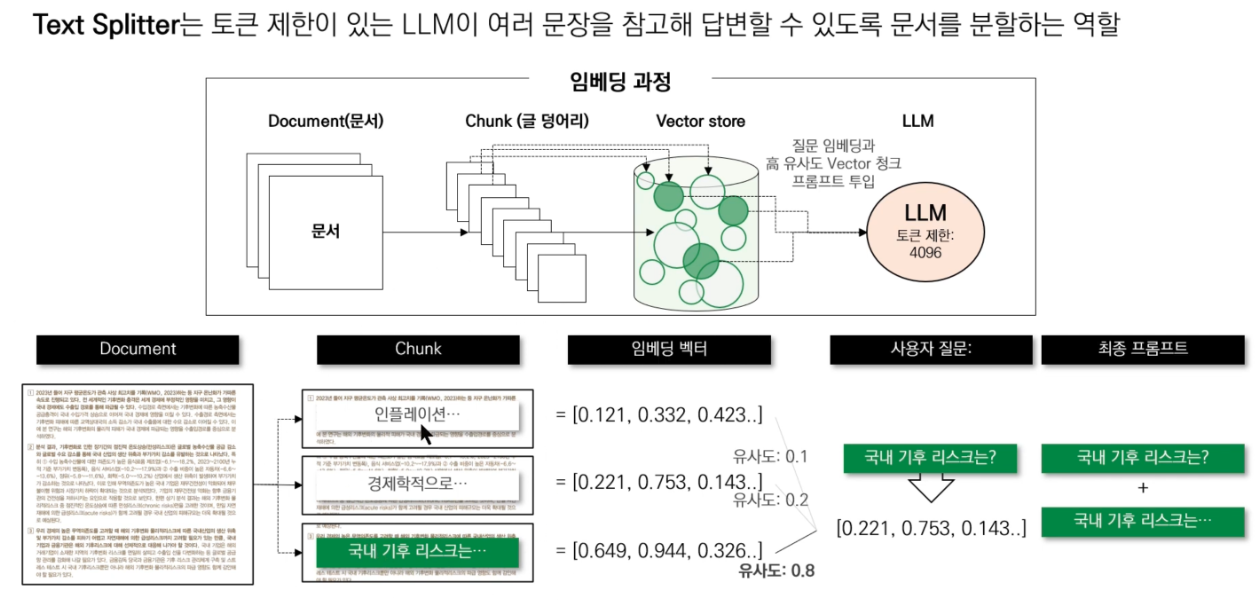

> LangChain은 긴 문서를 작은 단위인 청크(chunk)로 나누는 텍스트 분리 도구를 다양하게 지원합니다. 텍스트를 분리하는 작업을 청킹(chunking)이라고 부르기도 합니다. 이렇게 문서를 작은 조각으로 나누는 이유는 LLM 모델의 입력 토큰의 개수가 정해져 있기 때문입니다. 허용 한도를 넘는 텍스트는 모델에서 입력으로 처리할 수 없게 되는 것입니다. 한편, 텍스트가 너무 긴 경우에는 핵심 정보 이외에 불필요한 정보들이 많이 포함될 수 있어서 RAG 품질이 낮아지는 요인이 될 수도 있습니다. 핵심 정보가 유지될 수 있는 적절한 크기로 나누는 것이 매우 중요합니다.

LangChain이 지원하는 다양한 텍스트 분리기(Text Splitter)는 분할하려는 텍스트 유형과 사용 사례에 맞춰 선택할 수 있는 다양한 옵션이 제공됩니다. 크게 두 가지 차원에서 검토가 필요합니다.

1. `텍스트가 어떻게 분리되는지`:
  - 텍스트를 나눌 때 각 청크가 독립적으로 의미를 갖도록 나눠야 합니다. 이를 위해 문장, 구절, 단락 등 문서 구조를 기준으로 나눌 수 있습니다.

2. `청크 크기가 어떻게 측정되는지`:
  - 각 청크의 크기를 직접 조정할 수 있습니다. LLM 모델의 입력 크기와 비용 등을 종합적으로 고려하여 애플리케이션에 적합한 최적 크기를 결정하는 기준입니다. 예를 들면 단어 수, 문자 수 등을 기준으로 나눌 수 있습니다.

## CharacterTextSplitter

- `TextLoader` 클래스는 특정 파일에서 텍스트를 로드해서 `Document` 객체로 변환합니다.
- 여기서는 `'news.txt'` 파일에서 텍스트를 로드하고, 로드된 데이터 중에서 첫 번째 `Document` 객체의 페이지 내용의 길이와 해당 내용을 출력하고 있습니다.

In [ ]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader(DATA_PATH+'news.txt')
data = loader.load()

print(len(data[0].page_content))

1708


In [ ]:
data[0].page_content

'제목: \nAI2, 상업 활용까지 자유로운 \'진짜\' 오픈 소스 LLM \'올모\' 출시\n\n내용:\n앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) \'올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.\n벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다. \n이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다. \n올모 프레임워크는 70억 매개변수의 ‘올모 7B’ 등 4가지 변형 모델과 10억 매개변수의 ‘올모 1B’ 모델을 제공한다. 모델들은 훈련 데이터를 생성하는 코드를 포함해 사전 훈련을 위한 3조개의 토큰 공개 코퍼스를 특징으로 하는 AI2의 ‘돌마(Dolma)’ 데이터 세트를 기반으로 구축됐다.\n프레임워크에는 추론 코드, 훈련 지표 및 훈련 로그와 함께 최소 2조개의 토큰으로 훈련된 모델에 대한 전체 모델 가중치가 포함된다. 또 개발에 사용된 평가 제품군도 포함돼 있으며, 평가 제품군은 훈련 과정 중 1000단계마다 모델당 500개 이상의 체크포인트로 구성된다.\n또 아파치 2.0 라이선스에 따라 상업적 활용에 제한이 없다. \n이와 관련, 카네기 멜론대학교는 지난달 "빅테크의 오픈 소스 AI는 사실상 상업용 모델"이라며 "빅테크의 마케팅이나 규제회피 용도로 오픈 소스라는 단어를 활용한다"라고 비난한 바 있다. 실제 메타나 마이크로소프트, 애플 등이 공개한 오픈 소스는 연구에 한정되거나 상업 활용 시 사용자 수에 따라 별도 라이선스를 획득해야 한다.\n한나 하지시르지 AI2 올모 프로젝트 책임자는 "오늘날 많은 언어 모델은 제

### 문서를 개별 문자를 단위로 나누기 (separator="")

`CharacterTextSplitter` 클래스는 주어진 텍스트를 문자 단위로 분할하는 데 사용됩니다. 파이썬의 split 함수라고 생각하시면 됩니다. 다음 코드에서 적용된 주요 매개변수는 다음과 같습니다:
- `separator`: 분할된 각 청크를 구분할 때 기준이 되는 문자열입니다. 여기서는 빈 문자열('')을 사용하므로, 각 글자를 기준으로 분할합니다.
- `chunk_size`: 각 청크의 최대 길이입니다. 여기서는 500으로 설정되어 있으므로, 최대 500자까지의 텍스트가 하나의 청크에 포함됩니다.
- `chunk_overlap`: 인접한 청크 사이에 중복으로 포함될 문자의 수입니다. 여기서는 100으로 설정되어 있으므로, 각 청크들은 연결 부분에서 100자가 중복됩니다.
- `length_function`: 청크의 길이를 계산하는 함수입니다. 여기서는 len 함수가 사용되었으므로, 문자열의 길이를 기반으로 청크의 길이를 계산합니다.

`split_text` 메소드는 `주어진 텍스트(data[0].page_content)`를 위에서 설정한 매개변수에 따라 분할하고, 분할된 청크의 리스트를 반환합니다. `len(texts)`는 분할된 청크의 총 수를 나타냅니다.

여기서 중요한 것은 각 청크의 크기가 `chunk_size`를 초과하지 않으며, 인접한 청크 사이에는 `chunk_overlap`만큼의 문자가 중복되어 있음을 이해하는 것입니다. 이렇게 함으로써, 텍스트의 의미적 연속성을 유지하면서도 큰 데이터를 더 작은 단위로 분할할 수 있습니다.

In [ ]:
# 각 문자를 구분하여 분할
from langchain_text_splitters import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator = '',
    chunk_size = 500,
    chunk_overlap  = 100,
    length_function = len,
)

In [ ]:
texts = text_splitter.split_text(data[0].page_content)

len(texts)

5

- 분할된 텍스트 조각 중에서 첫번째 청크의 길이를 확인해보면 정확하게 500자임을 알 수 있습니다.

In [ ]:
len(texts[0])

499

- 첫 번째 청크의 내용을 출력해 보면, 500자가 되는 분할점에서 나눠지고 있습니다.
- 문장 중간에서 분할되기 때문에 맥락이 단절되는 문제가 있습니다.
- 이런 현상을 방지하기 위해서 적절한 크기의 `chunk_overlap`을 설정해 주는 것이 중요합니다.

In [ ]:
texts[0]

"제목: \nAI2, 상업 활용까지 자유로운 '진짜' 오픈 소스 LLM '올모' 출시\n\n내용:\n앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) '올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.\n벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다. \n이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다. \n올모 프레임워크는 70억 매개변수의 ‘올모 7B’ 등 4가지 변형 모델과 10억 매개변수의 ‘올모 1B’ 모델을 제공한다. 모델들은 훈련 데이터를 생성하는 코드를 포함해"

###  문서를 특정 문자열을 기준으로 나누기 (separator="문자열")
- `CharacterTextSplitter` 클래스의 `separator` 매개변수를 `줄바꿈 문자('\n')`로 설정하는 예제입니다. 이렇게 하면 각 청크를 나누는 기준을 줄바꿈 문자로 설정하는 것입니다.

In [ ]:
# 줄바꿈 문자를 기준으로 분할
text_splitter = CharacterTextSplitter(
    separator = '\n',
    chunk_size = 500,
    chunk_overlap  = 100,
    length_function = len,
)

In [ ]:
texts = text_splitter.split_text(data[0].page_content)

len(texts)

5

- 분할된 각 청크의 길이를 확인해보면 정확하게 500자 단위로 나누어지지 않았습니다.
- 이처럼 줄바꿈 문자를 기준으로 최대 500자를 맞출 수 있는 위치를 찾아서 분할하게 됩니다.

In [ ]:
len(texts[0]), len(texts[1])

(402, 351)

- 첫 번째 청크의 내용을 출력해 보면, 문장이 완전하게 끝나는 지점에서 분할되고 있습니다. 줄바꿈 문자가 있는 위치에서 나눠지기 때문입니다.

In [ ]:
texts[0]

"제목: \nAI2, 상업 활용까지 자유로운 '진짜' 오픈 소스 LLM '올모' 출시\n내용:\n앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) '올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.\n벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다. \n이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다."

## RecursiveCharacterTextSplitter

- `RecursiveCharacterTextSplitter` 클래스는 텍스트를 재귀적으로 분할하여 의미적으로 관련 있는 텍스트 조각들이 같이 있도록 하는 목적으로 설계되었습니다.
- 이 과정에서 `문자 리스트(['\n\n', '\n', ' ', ''])`의 문자를 순서대로 사용하여 텍스트를 분할하며, 분할된 청크들이 설정된 `chunk_size`보다 작아질 때까지 이 과정을 반복합니다.
- 여기서 `chunk_overlap`은 분할된 텍스트 조각들 사이에서 중복으로 포함될 문자 수를 정의합니다.
- `length_function = len` 코드는 분할의 기준이 되는 길이를 측정하는 함수로 문자열의 길이를 반환하는 `len` 함수를 사용한다는 의미입니다.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap  = 100,
    length_function = len,
)

- `texts = text_splitter.split_text(data[0].page_content)` 코드는 `data[0].page_content`에서 첫 번째 문서의 내용을 `RecursiveCharacterTextSplitter`를 사용하여 분할하고, 결과를 `texts` 변수에 할당합니다.
- `data` 리스트에서 첫 번째 문서의 내용을 기반으로 분할 작업을 수행하게 됩니다.
- `len(texts)`는 분할된 텍스트 조각들의 총 수를 반환합니다.

In [ ]:
texts = text_splitter.split_text(data[0].page_content)

len(texts)

7

- `RecursiveCharacterTextSplitter`에 의해 분할된 텍스트 조각들의 문자 수를 나타내며, 설정된 `chunk_size`와 분할 과정에서 적용된 조건들에 따라 달라집니다.
- `RecursiveCharacterTextSplitter`의 작동 방식에 따라, 이 길이들은 대체로 `chunk_size`에 가깝거나 그보다 작게 분할됩니다.
- 모두 500자보다 작은 글자수로 나누어집니다.

In [ ]:
len(texts[0]), len(texts[1])

(45, 356)

- 첫 번째 분할된 조각을 출력해보면, `CharacterTextSplitter` 클래스와 다르게 문장이 온전하게 유지된 채로 나누어지는 것을 볼 수 있습니다.

In [ ]:
texts[0]

"제목: \nAI2, 상업 활용까지 자유로운 '진짜' 오픈 소스 LLM '올모' 출시"

## 토큰 수를 기준으로 텍스트 분할 (Tokenizer 활용)

- 대규모 언어 모델(LLM)을 사용할 때 모델이 처리할 수 있는 토큰 수에는 한계가 있습니다.
- 입력 데이터를 모델의 제한을 초과하지 않도록 적절히 분할하는 것이 중요합니다.
- 이때 LLM 모델에 적용되는 토크나이저를 기준으로 텍스트를 토큰으로 분할하고, 이 토큰들의 수를 기준으로 텍스트를 청크로 나누면 모델 입력 토큰 수를 조절할 수 있습니다.

`CharacterTextSplitter.from_tiktoken_encoder` 메서드는 글자 수 기준으로 분할할 때 `tiktoken 토크나이저`를 기준으로 글자 수를 계산하여 분할합니다. 여기서 `encoding_name='cl100k_base'`는 텍스트를 토큰으로 변환하는 인코딩 방식을 나타냅니다.

In [ ]:
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=600,
    chunk_overlap=200,
    encoding_name='cl100k_base'
)

In [ ]:
docs = text_splitter.split_documents(data)
len(docs)

3

- 첫 번째 문서 객체의 분할된 청크의 크기와 문서 객체의 내용을 각각 출력하여 확인합니다.

In [ ]:
print(len(docs[0].page_content))
docs[0]

45


Document(metadata={'source': '/content/data/MyDrive/ai_lecture/3. Large Language Models/data/news.txt'}, page_content="제목: \nAI2, 상업 활용까지 자유로운 '진짜' 오픈 소스 LLM '올모' 출시")

# Embedding

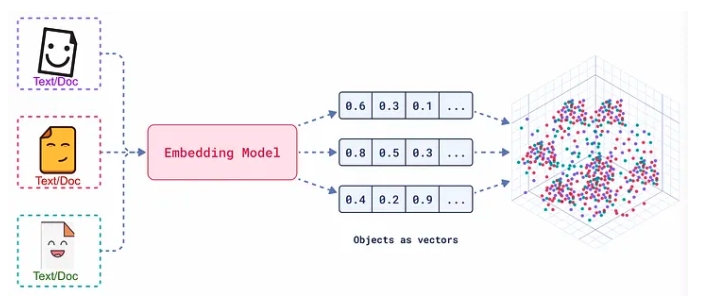

- 임베딩(Embedding)은 텍스트 데이터를 숫자로 이루어진 벡터로 변환하는 과정을 말합니다.
- 이러한 벡터 표현을 사용하면, 텍스트 데이터를 벡터 공간 내에서 수학적으로 다룰 수 있게 되며, 이를 통해 텍스트 간의 유사성을 계산하거나, 텍스트 데이터를 기반으로 하는 다양한 머신러닝 및 자연어 처리 작업을 수행할 수 있습니다.
- 임베딩 과정은 텍스트의 의미적인 정보를 보존하도록 설계되어 있어, 벡터 공간에서 가까이 위치한 텍스트 조각들은 의미적으로도 유사한 것으로 간주됩니다.

임베딩의 주요 활용 사례:
- `의미 검색(Semantic Search)`: 벡터 표현을 활용하여 의미적으로 유사한 텍스트를 검색하는 과정으로, 사용자가 입력한 쿼리에 대해 가장 관련성 높은 문서나 정보를 찾아내는 데 사용됩니다.
- `문서 분류(Document Classification)`: 임베딩된 텍스트 벡터를 사용하여 문서를 특정 카테고리나 주제에 할당하는 분류 작업에 사용됩니다.
- `텍스트 유사도 계산(Text Similarity Calculation)`: 두 텍스트 벡터 사이의 거리를 계산하여, 텍스트 간의 유사성 정도를 정량적으로 평가합니다.

임베딩 모델 제공자:
- `OpenAI`: GPT와 같은 언어 모델을 통해 텍스트의 임베딩 벡터를 생성할 수 있는 API를 제공합니다.
- `Hugging Face`: Transformers 라이브러리를 통해 다양한 오픈소스 임베딩 모델을 제공합니다.
- `Google`: Gemini, Gemma 등 언어 모델에 적용되는 임베딩 모델을 제공합니다.

임베딩 메소드:
- `embed_documents`: 이 메소드는 문서 객체의 집합을 입력으로 받아, 각 문서를 벡터 공간에 임베딩합니다. 주로 대량의 텍스트 데이터를 배치 단위로 처리할 때 사용됩니다.
- `embed_query`: 이 메소드는 단일 텍스트 쿼리를 입력으로 받아, 쿼리를 벡터 공간에 임베딩합니다. 주로 사용자의 검색 쿼리를 임베딩하여, 문서 집합 내에서 해당 쿼리와 유사한 내용을 찾아내는 데 사용됩니다.

임베딩은 텍스트 데이터를 머신러닝 모델이 이해할 수 있는 형태로 변환하는 핵심 과정입니다. 다양한 자연어 처리 작업의 기반이 되는 중요한 작업입니다.

## OpenAIEmbeddings
- `OpenAIEmbeddings` 클래스는 OpenAI의 API를 활용하여, 각 문서를 대응하는 임베딩 벡터로 변환합니다.
- `langchain_openai` 라이브러리에서 `OpenAIEmbeddings` 클래스를 직접 임포트합니다.

In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings()

- `embed_documents` 메소드는 입력 받은 5개의 문서 객체를 각각 별도의 벡터로 임베딩합니다.
- `embeddings` 변수에는 각 텍스트에 대한 벡터 표현을 담고 있는 리스트가 할당됩니다.
- `len(embeddings)`는 입력된 텍스트 리스트의 개수와 동일하며, 이는 임베딩 과정을 거친 문서의 총 수를 나타냅니다.

In [ ]:
embeddings = embeddings_model.embed_documents(
    [
        '안녕하세요!',
        '어! 오랜만이에요',
        '이름이 어떻게 되세요?',
        '날씨가 추워요',
        'Hello LLM!'
    ]
)

- `len(embeddings[0])`는 첫 번째 문서의 벡터 표현의 차원을 나타냅니다.
- 일반적으로 이 차원 수는 선택된 모델에 따라 정해지며, 모든 임베딩 벡터는 동일한 차원을 가집니다.

In [ ]:
len(embeddings), len(embeddings[0])

(5, 1536)

- 첫 번째 문서의 변환된 임베딩 벡터를 출력해 봅니다.
- 이처럼 각 문서를 임베딩으로 변환하면 숫자를 원소로 갖는 긴 벡터 형태를 갖게 됩니다.



In [ ]:
print(embeddings[0][:20])

[-0.010432514362037182, -0.013580637983977795, -0.0064862752333283424, -0.018673377111554146, -0.018267985433340073, 0.01667175441980362, -0.009222672320902348, 0.003898732829838991, -0.00743641285225749, 0.010071462020277977, 0.011800712905824184, -0.0066382973454892635, -0.025337012484669685, -0.022423256188631058, -0.004858372267335653, -0.02167581394314766, 0.025337012484669685, -0.01759655401110649, 0.007930484600365162, -0.017963942140340805]


- `embed_query` 메소드는 단일 쿼리 문자열을 받아 이를 벡터 공간에 임베딩합니다.
- 주로 검색 쿼리나 질문 같은 단일 텍스트를 임베딩할 때 유용하며, 생성된 임베딩을 사용해 유사한 문서나 답변을 찾을 수 있습니다.

In [ ]:
embedded_query = embeddings_model.embed_query('첫인사를 하고 이름을 물어봤나요?')

- `embedded_query[:5]`는 생성된 임베딩 벡터의 처음 5개 원소를 슬라이싱하여 반환합니다. 임베딩의 일부 특성을 살펴볼 수 있습니다.

In [ ]:
embedded_query[:5]

[0.0036278453189879656,
 -0.024240173399448395,
 0.010880389250814915,
 -0.04102957993745804,
 -0.004414455499500036]

### 코사인 유사도
- 코사인 유사도는 두 벡터 간의 코사인 각을 이용하여 유사성을 측정하는 방법입니다.
- 두 벡터의 방향이 완전히 동일하면 코사인 유사도는 1이 됩니다. 90도로 수직이면 0, 반대 방향이면 -1이 됩니다.
- 이는 텍스트 임베딩과 같이 고차원 공간에서 벡터 간 유사도를 측정하는 데 유용하게 사용됩니다.

In [ ]:
# 코사인 유사도
import numpy as np
from numpy import dot
from numpy.linalg import norm

cos_sim 함수는 두 벡터 A와 B 사이의 코사인 유사도를 계산합니다.
- `dot(A, B)`는 두 벡터의 내적을, `norm(A)`와 `norm(B)`는 각각 벡터 A와 B의 노름(크기)을 계산합니다.
- 이 함수는 내적 값과 두 벡터 크기의 곱으로 나눈 값으로 코사인 유사도를 계산합니다.

In [ ]:
def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

- 앞에서 임베딩 변환한 문서들(embeddings)과 하나의 임베딩된 쿼리(embedded_query) 사이의 코사인 유사도를 계산하여 출력합니다.
- 각 문서 임베딩에 대해 cos_sim 함수를 호출하여, 해당 문서가 쿼리와 얼마나 유사한지를 숫자로 나타냅니다.
- 유사도가 높은 문서일수록 쿼리와 더 관련이 깊다고 볼 수 있습니다.

In [ ]:
for embedding in embeddings:
    print(cos_sim(embedding, embedded_query))

0.8348159356519259
0.8153598883956
0.8843727343154585
0.7898927808309193
0.7469070089071632


## CacheBackedEmbeddings
- Embeddings는 재계산을 피하기 위해 저장되거나 일시적으로 캐시될 수 있습니다.
- Embeddings를 캐싱하는 것은 CacheBackedEmbeddings를 사용하여 수행될 수 있습니다.
- 캐시 지원 embedder는 embeddings를 키-값 저장소에 캐싱하는 embedder 주변에 래퍼입니다.
- 텍스트는 해시되고 이 해시는 캐시에서 키로 사용됩니다.

- CacheBackedEmbeddings를 초기화하는 주요 지원 방법은 from_bytes_store입니다. 이는 다음 매개변수를 받습니다:
  - `underlying_embeddings`: 임베딩을 위해 사용되는 embedder.
  - `document_embedding_cache`: 문서 임베딩을 캐싱하기 위한 ByteStore 중 하나.
  - `namespace`: (선택 사항, 기본값은 "") 문서 캐시를 위해 사용되는 네임스페이스. 이 네임스페이스는 다른 캐시와의 충돌을 피하기 위해 사용됩니다. 예를 들어, 사용된 임베딩 모델의 이름으로 설정하세요.

### LocalFileStore 에서 임베딩 사용 (영구 보관)

In [ ]:
from langchain.storage import LocalFileStore
from langchain_openai import OpenAIEmbeddings
from langchain.embeddings import CacheBackedEmbeddings

# OpenAI 임베딩을 사용하여 기본 임베딩 설정
embedding = OpenAIEmbeddings()

# 로컬 파일 저장소 설정
store = LocalFileStore("./cache/")

# 캐시를 지원하는 임베딩 생성
cached_embedder = CacheBackedEmbeddings.from_bytes_store(
    underlying_embeddings=embedding,
    document_embedding_cache=store,
    namespace=embedding.model,  # 기본 임베딩과 저장소를 사용하여 캐시 지원 임베딩을 생성
)

In [ ]:
# store에서 키들을 순차적으로 가져옵니다.
list(store.yield_keys())

[]

In [ ]:
from langchain.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter

# 문서 로드
raw_documents = TextLoader(DATA_PATH+'history.txt').load()
# 문자 단위로 텍스트 분할 설정
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
# 문서 분할
documents = text_splitter.split_documents(raw_documents)

- FAISS

In [ ]:
!pip install faiss-gpu sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 19.8 MB/s eta 0:00:00


In [ ]:
from langchain_community.vectorstores import FAISS

In [ ]:
# 코드 실행 시간을 측정합니다.
%time db = FAISS.from_documents(documents, cached_embedder)  # 문서로부터 FAISS 데이터베이스 생성


CPU times: user 34.1 ms, sys: 2.91 ms, total: 37 ms
Wall time: 251 ms


- 벡터 저장소를 다시 생성하려고 하면, 임베딩을 다시 계산할 필요가 없기 때문에 훨씬 더 빠르게 처리됩니다.

In [ ]:
# 캐싱된 임베딩을 사용하여 FAISS 데이터베이스 생성
%time db2 = FAISS.from_documents(documents, cached_embedder)


CPU times: user 1.84 ms, sys: 993 µs, total: 2.84 ms
Wall time: 2.61 ms


### InmemoryByteStore 사용 (비영구적)

In [ ]:
from langchain.embeddings import CacheBackedEmbeddings
from langchain.storage import InMemoryByteStore

store = InMemoryByteStore()  # 메모리 내 바이트 저장소 생성

# 캐시 지원 임베딩 생성
cached_embedder = CacheBackedEmbeddings.from_bytes_store(
    embedding, store, namespace=embedding.model
)


In [ ]:
# 코드 실행 시간을 측정합니다.
%time db = FAISS.from_documents(documents, cached_embedder)  # 문서로부터 FAISS 데이터베이스 생성

CPU times: user 13.1 ms, sys: 98 µs, total: 13.2 ms
Wall time: 198 ms


## HuggingFaceEmbeddings

- `sentence-transformers` 라이브러리를 사용하면 HuggingFace 모델에서 사용된 사전 훈련된 임베딩 모델을 다운로드 받아서 적용할 수 있습니다.
- OpenAI 임베딩 모델을 사용할 때는 API 사용료가 부과되지만, HuggingFace의 오픈소스 기반의 임베딩 모델을 사용하면 요금이 부과되지 않습니다.

먼저 `sentence-transformers 라이브러리를 설치`합니다.

In [ ]:
!pip install -U sentence-transformers langchain_huggingface

`HuggingFaceEmbeddings` 클래스는 Hugging Face의 트랜스포머 모델을 사용하여 문서 또는 문장을 임베딩하는 데 사용됩니다. 다음은 주요 매개변수의 설정 값을 설명합니다.
- `model_name='jhgan/ko-sroberta-nli'` : 사용할 모델을 지정합니다. 여기서는 한국어 자연어 추론(Natural Language Inference, NLI)에 최적화된 ko-sroberta 모델을 사용합니다.
- `model_kwargs={'device':'cpu'}` : 모델이 CPU에서 실행되도록 설정합니다. GPU를 사용할 수 있는 환경이라면 'cuda'로 설정할 수도 있습니다.
- `encode_kwargs={'normalize_embeddings':True}` : 임베딩을 정규화하여 모든 벡터가 같은 범위의 값을 갖도록 합니다. 이는 유사도 계산 시 일관성을 높여줍니다.

In [ ]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

embeddings_model = HuggingFaceEmbeddings(
    model_name='jhgan/ko-sroberta-nli',
    encode_kwargs={'normalize_embeddings':True},
)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.49k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

- `embeddings_model` 을 출력해보면 Pooling 레이어의 `word_embedding_dimension` 값에서 임베딩 벡터의 크기를 확인할 수 있습니다. 768차원의 벡터라는 것을 알 수 있습니다.

In [ ]:
embeddings_model

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: RobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
), model_name='jhgan/ko-sroberta-nli', cache_folder=None, model_kwargs={}, encode_kwargs={'normalize_embeddings': True}, multi_process=False, show_progress=False)

- `embed_documents` 메소드는 주어진 5개의 문장으로 구성된 텍스트 리스트를 임베딩합니다. 임베딩 벡터는 768차원으로 확인됩니다.

In [ ]:
embeddings = embeddings_model.embed_documents(
    [
        '안녕하세요!',
        '어! 오랜만이에요',
        '이름이 어떻게 되세요?',
        '날씨가 추워요',
        'Hello LLM!'
    ]
)
len(embeddings), len(embeddings[0])

(5, 768)

- `embed_query` 메소드는 단일 쿼리 문장을 임베딩합니다. 이렇게 생성된 임베딩은 cos_sim 함수를 사용하여 쿼리와 각 문서 간의 코사인 유사도를 계산합니다.
- 이 유사도 점수를 통해 쿼리와 가장 관련이 깊은 문서를 파악할 수 있습니다.

In [ ]:
embedded_query = embeddings_model.embed_query('첫인사를 하고 이름을 물어봤나요?')

for embedding in embeddings:
    print(cos_sim(embedding, embedded_query))

0.5899015923629779
0.4182631640550583
0.7240604258804563
0.057026606988049566
0.43164182729514833


# Vector Store
- 벡터 저장소(Vector Store)는 벡터 형태로 표현된 데이터, 즉 임베딩 벡터들을 효율적으로 저장하고 검색할 수 있는 시스템이나 데이터베이스를 의미합니다.
- 자연어 처리(NLP), 이미지 처리, 그리고 기타 다양한 머신러닝 응용 분야에서 생성된 고차원 벡터 데이터를 관리하기 위해 설계되었습니다.
- 벡터 저장소의 핵심 기능은 대규모 벡터 데이터셋에서 빠른 속도로 가장 유사한 항목을 찾아내는 것입니다.

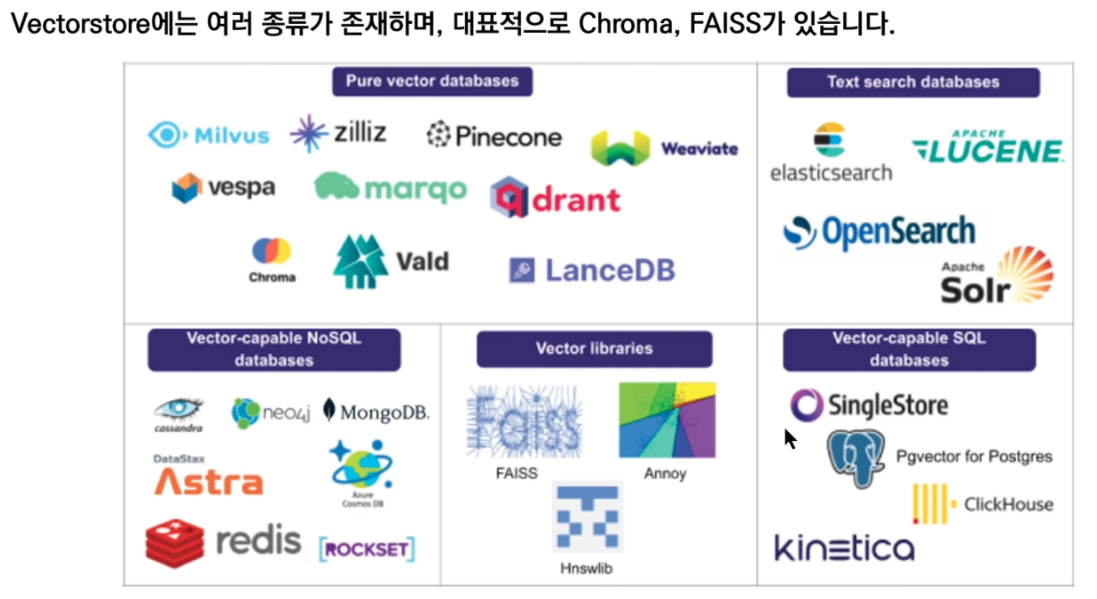

`벡터 저장`
- 임베딩 벡터는 텍스트, 이미지, 소리 등 다양한 형태의 데이터를 벡터 공간에 매핑한 것으로, 데이터의 의미적, 시각적, 오디오적 특성을 수치적으로 표현합니다.
- 이러한 벡터를 효율적으로 저장하기 위해서는 고차원 벡터를 처리할 수 있도록 최적화된 데이터 저장 구조가 필요합니다.

`벡터 검색`
- 저장된 벡터들 중에서 사용자의 쿼리에 가장 유사한 벡터를 빠르게 찾아내는 과정입니다.
- 이를 위해 코사인 유사도, 유클리드 거리, 맨해튼 거리 등 다양한 유사도 측정 방법을 사용할 수 있습니다.
- 코사인 유사도는 방향성을 기반으로 유사도를 측정하기 때문에 텍스트 임베딩 검색에 특히 자주 사용됩니다.

`결과 반환`
- 사용자의 쿼리에 대해 계산된 유사도 점수를 기반으로 가장 유사한 항목들을 순서대로 사용자에게 반환합니다.
- 이 과정에서는 유사도 점수뿐만 아니라, 검색 결과의 관련성, 다양성, 신뢰도 등 다른 요소들을 고려할 수도 있습니다.

## Chroma
Chroma는 임베딩 벡터를 저장하기 위한 오픈소스 소프트웨어로, LLM(대규모 언어 모델) 앱 구축을 용이하게 하는 핵심 기능을 수행합니다. Chroma의 주요 특징은 다음과 같습니다:
- `임베딩 및 메타데이터 저장`: 대규모의 임베딩 데이터와 이와 관련된 메타데이터를 효율적으로 저장할 수 있습니다.
- `문서 및 쿼리 임베딩`: 텍스트 데이터를 벡터 공간에 매핑하여 임베딩을 생성할 수 있으며, 이를 통해 검색 작업이 가능합니다.
- `임베딩 검색`: 사용자 쿼리에 기반하여 가장 관련성 높은 임베딩을 찾아내는 검색 기능을 제공합니다.

### 유사도 기반 검색 (Similarity search)
- Chroma 벡터 저장소를 사용하여 임베딩된 텍스트 데이터를 저장하고 검색하는 방법을 설명합니다.
- Chroma 벡터 저장소를 사용하여 대규모 텍스트 데이터셋에서 빠르고 효율적으로 유사도 기반 검색(Similarity search)을 수행할 수 있습니다.

구체적인 단계는 다음과 같습니다:

1. 텍스트 데이터 로드
  - `TextLoader` 클래스를 사용해 `news.txt` 파일에서 텍스트 데이터를 로드합니다.
  - 로드된 데이터는 data 변수에 저장됩니다.

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma

loader = TextLoader(DATA_PATH+'news.txt')
data = loader.load()

2. 텍스트 분할
  - `RecursiveCharacterTextSplitter`를 사용하여 로드된 텍스트를 여러 개의 작은 조각으로 분할합니다.
  - 분할된 텍스트 조각들은 texts 변수에 저장됩니다.

In [ ]:
texts = text_splitter.split_text(data[0].page_content)
texts[0]

"제목: \nAI2, 상업 활용까지 자유로운 '진짜' 오픈 소스 LLM '올모' 출시"

3. 임베딩 모델 초기화
  - `OpenAIEmbeddings`를 사용하여 OpenAI 임베딩 모델의 인스턴스를 생성합니다.
  - 이 단계에서 Huggingface 또는 다른 임베딩 모델을 사용할 수 있습니다.

In [ ]:
embeddings_model = OpenAIEmbeddings()

4. Chroma 벡터 저장소 생성
  - `Chroma.from_texts` 메소드를 사용하여 분할된 텍스트들을 임베딩하고, 이 임베딩을 `Chroma` 벡터 저장소에 저장합니다.
  - 저장소는 `collection_name`으로 구분되며, 여기서는 `'news'`라는 이름을 사용합니다.
  - 저장된 데이터는 `./db/chromadb` 디렉토리에 저장됩니다.
  - `collection_metadata`에서 `'hnsw:space': 'cosine'`을 설정하여 유사도 계산에 코사인 유사도를 사용합니다.


In [ ]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.3/584.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 13.5 MB/s eta 0:00

In [ ]:
db = Chroma.from_texts(
    texts,
    embeddings_model,
    collection_name = 'news',
    persist_directory = './db/chromadb',
    collection_metadata = {'hnsw:space': 'cosine'}, # l2 is the default
)

5. 유사도 기반 검색 수행
  - `query` 변수에 검색 쿼리를 정의합니다.
  - `db.similarity_search` 메소드를 사용하여 저장된 데이터 중에서 쿼리와 가장 유사한 문서를 찾습니다.
  - 검색 결과를 `docs` 변수에 저장하고, 가장 유사한 문서의 내용은 `docs[0].page_content`를 통해 확인합니다.

In [ ]:
query = '올모은 무엇인가요?'
docs = db.similarity_search(query)
print(docs[0].page_content)

내용:
앨런AI연구소(AI2)가 완전한 오픈 소스 대형언어모델(LLM) '올모(OLMo)’를 출시했다. 데이터 수집, 학습, 배포의 전 과정을 투명하게 공개한 데다 상업적 사용까지 허용한 진정한 의미의 오픈 소스 LLM이라는 평가다.
벤처비트는 1일(현지시간) 비영리 민간 AI 연구기관인 AI2가 ‘최초의 진정한 오픈 소스 LLM 및 프레임워크’라고 소개한 ‘올모’를 출시했다고 보도했다. 
이에 따르면 올모는 모델 코드와 모델 가중치뿐만 아니라 훈련 코드, 훈련 데이터, 관련 툴킷 및 평가 툴킷도 제공한다. 이를 통해 모델이 어떻게 구축되었는지 심층적으로 분석, LLM의 작동 방식과 응답을 생성하는 원리를 더 잘 이해할 수 있다. 
올모 프레임워크는 70억 매개변수의 ‘올모 7B’ 등 4가지 변형 모델과 10억 매개변수의 ‘올모 1B’ 모델을 제공한다. 모델들은 훈련 데이터를 생성하는 코드를 포함해 사전 훈련을 위한 3조개의 토큰 공개 코퍼스를 특징으로 하는 AI2의 ‘돌마(Dolma)’ 데이터 세트를 기반으로 구축됐다.
프레임워크에는 추론 코드, 훈련 지표 및 훈련 로그와 함께 최소 2조개의 토큰으로 훈련된 모델에 대한 전체 모델 가중치가 포함된다. 또 개발에 사용된 평가 제품군도 포함돼 있으며, 평가 제품군은 훈련 과정 중 1000단계마다 모델당 500개 이상의 체크포인트로 구성된다.
또 아파치 2.0 라이선스에 따라 상업적 활용에 제한이 없다. 
이와 관련, 카네기 멜론대학교는 지난달 "빅테크의 오픈 소스 AI는 사실상 상업용 모델"이라며 "빅테크의 마케팅이나 규제회피 용도로 오픈 소스라는 단어를 활용한다"라고 비난한 바 있다. 실제 메타나 마이크로소프트, 애플 등이 공개한 오픈 소스는 연구에 한정되거나 상업 활용 시 사용자 수에 따라 별도 라이선스를 획득해야 한다.
한나 하지시르지 AI2 올모 프로젝트 책임자는 "오늘날 많은 언어 모델은 제한된 투명성으로 공개된다"라며 “훈련 데이터에 접근하지 못하면 연구자들은 모델이 어떻게 작동하는지 과학적으로 이해할

### MMR (Maximum marginal relevance search)
- 최대 한계 관련성(Maximum Marginal Relevance, MMR) 검색 방식은 유사성과 다양성의 균형을 맞추어 검색 결과의 품질을 향상시키는 알고리즘입니다.
- 이 방식은 검색 쿼리에 대한 문서들의 관련성을 최대화하는 동시에, 검색된 문서들 사이의 중복성을 최소화하여, 사용자에게 다양하고 풍부한 정보를 제공하는 것을 목표로 합니다.

MMR의 주요 매개변수:
- `query`: 사용자로부터 입력받은 검색 쿼리입니다.
- `k`: 최종적으로 선택할 문서의 수입니다. 이 매개변수는 반환할 문서의 총 개수를 결정합니다.
- `fetch_k`: MMR 알고리즘을 수행할 때 고려할 상위 문서의 수입니다. 이는 초기 후보 문서 집합의 크기를 의미하며, 이 중에서 MMR에 의해 최종 문서가 k개 만큼 선택됩니다.
- `lambda_mult`: 쿼리와의 유사성과 선택된 문서 간의 다양성 사이의 균형을 조절합니다. $(\lambda = 1)$은 유사성만 고려하며, $(\lambda = 0)$은 다양성만을 최대화합니다.

MMR 방식을 사용하면, 검색 결과로 얻은 문서들이 쿼리와 관련성이 높으면서도 서로 다른 측면이나 정보를 제공하도록 할 수 있습니다. 이는 특히 정보 검색이나 추천 시스템에서 사용자에게 더 풍부하고 만족스러운 결과를 제공하는 데 도움이 됩니다.

- 먼저 `PyMuPDFLoader`를 사용하여 `PDF 파일('000660_SK_2023.pdf')`에서 텍스트 데이터를 로드합니다.
- 이 클래스는 `PyMuPDF` 라이브러리를 사용하여 PDF 문서의 내용을 추출합니다.

필요한 경우 `pip install pymupdf` 명령어로 라이브러리를 설치합니다.

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma

loader = PyMuPDFLoader(DATA_PATH+'000660_SK_2023.pdf')
data = loader.load()

- `RecursiveCharacterTextSplitter`를 사용하여 문서를 텍스트 조각으로 분할하는 인스턴스를 생성하고 `text_splitter.split_documents(data)`를 호출하여 로드된 문서 객체를 여러 개의 청크로 분할합니다.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=1000,
    chunk_overlap=200,
    encoding_name='cl100k_base'
)

documents = text_splitter.split_documents(data)
len(documents)

55

- 다음은 `OpenAIEmbeddings` 클래스를 사용하여 임베딩 모델의 인스턴스를 생성합니다.
- `Chroma.from_documents` 메소드를 사용하여 분할된 문서들을 임베딩하고, 이 임베딩들을 `Chroma` 벡터 저장소에 저장합니다.
- 여기서는 `esg`라는 컬렉션 이름을 사용하며, 데이터는 `./db/chromadb `디렉토리에 저장됩니다.
- `collection_metadata`를 통해 유사도 검색에 사용될 공간('hnsw:space')을 'cosine'으로 지정하여, 코사인 유사도를 사용합니다.

In [ ]:
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

embeddings_model = OpenAIEmbeddings()
db2 = Chroma.from_documents(
    documents,
    embeddings_model,
    collection_name = 'esg',
    persist_directory = './db/chromadb',
    collection_metadata = {'hnsw:space': 'cosine'}, # l2 is the default
)

1. 일반적인 유사도 기반 검색:
  - `len(docs)`는 반환된 문서의 총 수를 출력합니다.
  - `docs[0].page_content`는 검색 결과 중 가장 유사한 문서의 내용을 출력합니다.

In [ ]:
query = 'SK주식회사는 4대 핵심 투자를 알려줘?'
docs = db2.similarity_search(query)
print(len(docs))
print(docs[0].page_content)

4
식
회
사
, SK C&C 합
병
 
및
 지
주
/사
업
부
문
 구
분
•  반
도
체
, 바
이
오
 등
 유
망
 성
장
 
전
망
 분
야
에
 선
제
적
 투
자
2007
지
주
사
 체
제
 전
환
• 경
영
효
율
성
과
 	
	
재
무
건
전
성
 제
고
를
 위
한
 	
선
진
 경
영
시
스
템
 도
입
 
Holding Company  
OUR JOURNEY
: Transforming 
into an Investment 
Company


- 다음은 검색 결과 중 가장 유사도가 낮은(또는 마지막에 위치한) 문서의 내용을 출력합니다.

In [ ]:
print(docs[-1].page_content)

드
시
 
반
영
되
어
야
 하
는
 필
수
 요
소
이
자
 
기
회
입
니
다
. SK는
 기
업
가
치
의
 건
강
한
 
성
장
과
 이
해
관
계
자
의
 지
속
가
능
한
 행
복
을
 
위
해
 경
영
의
사
결
정
의
 DNA로
서
 
ESG(환
경
/사
회
/지
배
구
조
)를
 
내
재
화
하
고
 있
습
니
다
.
ESG 관
리
의
 단
계
적
 고
도
화
포
트
폴
리
오
 ESG 관
리
 역
량
 축
적
, 
글
로
벌
 Top-tier 수
준
 ESG 관
리
체
계
 확
보
성
장
단
계
별
 관
리
 차
별
화
투
자
기
업
 성
숙
도
(기
업
의
 Life Cycle)에
따
라
 적
합
한
 ESG Value-up 실
현
산
업
별
 중
점
관
리
항
목
 체
계
화
산
업
별
 기
업
가
치
에
 큰
 영
향
을
 주
는
 
ESG 이
슈
 집
중
 관
리
Where we are heading    |     How we get there    |     What we are preparing


2. MMR 검색:
  - 동일한 쿼리를 사용하여 MMR 검색을 수행합니다. 여기서는 `k=4`와 `fetch_k=10`을 설정하여, 상위 10개의 유사한 문서 중에서 서로 다른 정보를 제공하는 4개의 문서를 선택합니다.
  - `len(mmr_docs)`는 MMR 검색으로 선택된 문서의 총 수, 여기서는 4개를 출력합니다.
  - `mmr_docs[0].page_content`는 MMR 검색 결과 중 가장 높은 순위의 문서의 내용을 출력합니다.

In [ ]:
mmr_docs = db2.max_marginal_relevance_search(query, k=4, fetch_k=10)
print(len(mmr_docs))
print(mmr_docs[0].page_content)

4
식
회
사
, SK C&C 합
병
 
및
 지
주
/사
업
부
문
 구
분
•  반
도
체
, 바
이
오
 등
 유
망
 성
장
 
전
망
 분
야
에
 선
제
적
 투
자
2007
지
주
사
 체
제
 전
환
• 경
영
효
율
성
과
 	
	
재
무
건
전
성
 제
고
를
 위
한
 	
선
진
 경
영
시
스
템
 도
입
 
Holding Company  
OUR JOURNEY
: Transforming 
into an Investment 
Company


- 다음은 MMR 검색 결과 중 가장 낮은 순위의 문서의 내용을 출력합니다.

In [ ]:
print(mmr_docs[-1].page_content)

조
정
합
병
매
각
첨
단
소
재
그
린
바
이
오
디
지
털
2023
2022.05
Terra Pow
er 투
자
 
소
형
모
듈
형
원
전
(SM
R) 
기
술
 기
반
 탈
탄
소
 시
장
 선
점
2021.06
M
onolith 투
자
 
청
록
수
소
 기
반
 
수
소
 사
업
 확
장
2022.08
Atom
 Pow
er 투
자
 
SSCB(스
마
트
회
로
차
단
기
) 기
술
 기
반
 
EV충
전
 에
너
지
 솔
루
션
 사
업
 확
장
2021.08  
SK시
그
넷
 인
수
 
EV충
전
 인
프
라
 사
업
 확
장
2021.11
SK E&S 비
즈
니
스
 유
동
화
 
도
시
가
스
 사
업
 상
환
우
선
주
 
발
행
* ROIC(Return on Invested Capital) : 투
하
자
본
수
익
률
* 주
요
 증
권
사
 추
정
치
 평
균
 기
준
포
트
폴
리
오
 관
리
 원
칙
·  차
세
대
 소
형
 모
듈
형
 원
전
(SM
R) 
및
 리
튬
메
탈
 배
터
리
 등
 	
	
미
래
 유
망
영
역
 선
제
투
자
포
트
폴
리
오
  조
정
, 
합
병
, 매
수
, 매
각
 등
  
재
편
 및
 전
환
 검
토
ROIC
* 관
점
 
평
가
·관
리
자
본
조
달
비
용
, 
시
장
 요
구
수
익
률
, 
투
자
기
회
비
용
 등
종
합
 검
토
적
극
적
인
 포
트
폴
리
오
In & Out
포
트
폴
리
오
 가
치
* 성
장
 
(조
원
)
2020 
2022
22.6
28.4
PORTFOLIO MANAGEMENT FRAMEWORK
경
제
적
 가
치
와
 ESG 가
치
를
 통
합
적
으
로
 고
려
하
는
 포
트
폴
리
오
 관
리
체
계
4대
 핵
심
 영
역
 중
심
의
 포
트
폴
리
오
 재
편
SK주
식
회
사
는
 2017년
 투
자
형
 전
문
회
사
 선
언
 이
후
 약
 58개
의
 
투
자
 포
트
폴
리
오
를
 편
입
하
였
으
며
, 포
트
폴
리
오


## FAISS
- FAISS(Facebook AI Similarity Search)는 Facebook AI Research에 의해 개발된 라이브러리로, 대규모 벡터 데이터셋에서 유사도 검색을 빠르고 효율적으로 수행할 수 있게 해줍니다.
- FAISS는 특히 벡터의 압축된 표현을 사용하여 메모리 사용량을 최소화하면서도 검색 속도를 극대화하는 특징이 있습니다.

유사도 기준
  - `'l2' (기본값)`: 유클리디안 거리를 기반으로 하는 유사도 측정 방법입니다. 두 벡터 간의 거리가 작을수록 더 유사하다고 평가합니다.
  - `'ip' (내적)`: 내적 기반 유사도 측정 방법으로, 두 벡터의 방향성이 얼마나 유사한지를 평가합니다. 값이 클수록 더 유사하다고 판단합니다.
  - `'cosine'`: 코사인 유사도를 기반으로 하는 방법으로, 두 벡터의 각도가 작을수록 (즉, 방향이 더 유사할수록) 더 유사하다고 평가합니다. 내적과 유사하지만, 벡터의 크기에 영향을 받지 않습니다.

### 유사도 기반 검색 (Similarity search)

- FAISS 기반의 벡터 스토어를 생성하고 Huggingface에서 한국어 임베딩 모델을 다운로드 받아서 검색하는 과정을 살펴 보겠습니다.
- 먼저 `faiss-cpu와 sentence-transformers 패키지`를 설치합니다. FAISS는 CPU만 사용하는 버전(`faiss-cpu`)과 GPU를 지원하는 버전(`faiss-gpu`)으로 나뉘는데, 여기서는 GPU 버전을 설치하는 방법으로 설명합니다.
- `sentence-transformers`는 임베딩 모델을 허깅페이스에서 다운로드 받기 위해서 설치합니다.

In [ ]:
!pip install faiss-gpu sentence-transformers

- `HuggingFaceEmbeddings` 클래스를 사용하여 사전 학습된 임베딩 모델(jhgan/ko-sbert-nli)을 로드하고, `FAISS.from_documents` 메서드를 사용하여 문서 객체를 임베딩 벡터로 변환하여 벡터 저장소에 저장합니다.
- 여기서 `distance_strategy`는 벡터 간 거리(또는 유사도)를 측정하는 방법을 결정합니다.
- `DistanceStrategy.COSINE`은 문서 간의 유사도를 측정할 때 코사인 유사도를 사용하겠다는 것을 의미합니다.

단, 문서 객체를 임베딩 벡터로 변환하여 벡터 저장소에 저장할 때, 모델의 입력 길이 제한을 고려해야 합니다. jhgan/ko-sbert-nli 모델의 경우 최대 시퀀스 길이는 128 토큰입니다. (일반적인 BERT 기반 모델은 최대 시퀀스 길이가 512 토큰입니다.) 최대 시퀀스 길이를 초과하는 입력 문장은 잘리거나 패딩 처리됩니다.

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_community.vectorstores.utils import DistanceStrategy
from langchain_community.embeddings import HuggingFaceEmbeddings

embeddings_model = HuggingFaceEmbeddings(
    model_name='jhgan/ko-sbert-nli',
    model_kwargs={'device':'cpu'}, # model_kwargs={'device':'cuda'},
    encode_kwargs={'normalize_embeddings':True},
)

/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_name" in HuggingFaceInferenceAPIEmbeddings has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
<ipython-input-87-e946ce68a327>:5: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  embeddings_model = HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/620 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
vectorstore = FAISS.from_documents(documents,
                                   embedding = embeddings_model,
                                   distance_strategy = DistanceStrategy.COSINE
                                  )

- 벡터 저장소의 유사도 측정 기준을 출력해 보면, 앞서 설정한 'COSINE' 을 확인할 수 있습니다.

In [ ]:
vectorstore.distance_strategy

<DistanceStrategy.COSINE: 'COSINE'>

`vectorstore.similarity_search` 메서드는 주어진 쿼리 문자열에 대해 벡터 스토어 내의 문서들 중에서 가장 유사한 문서들을 찾아내는 작업을 다음 단계에 따라 수행합니다.
1. `쿼리 인코딩`: 주어진 쿼리 문자열을 벡터로 변환합니다. 이 과정은 vectorstore를 생성할 때 사용된 임베딩 모델(embeddings_model)을 사용하여 수행됩니다.
2. `유사도 검색`: 변환된 쿼리 벡터와 벡터 스토어에 저장된 문서 벡터들 간의 유사도를 계산하여, 가장 유사한 문서들을 찾아냅니다. 이 때, 유사도 계산 방법은 vectorstore 생성 시 지정된 distance_strategy에 따라 결정됩니다.
3. `결과 반환`: 검색 결과로 얻어진 문서들을 유사도 순으로 정렬하여 반환합니다.

In [ ]:
query = 'SK주식회사는 4대 핵심 투자를 알려줘?'
docs = vectorstore.similarity_search(query)
print(len(docs))
print(docs[0].page_content)

4
11
10
ESG Special Report 2023
Where we are heading    |     How we get there    |     What we are preparing
SK의
 끊
임
없
는
 도
전
과
 미
래
를
 앞
서
가
는
 혜
안
을
 
바
탕
으
로
 SK그
룹
의
 지
주
사
인
 SK주
식
회
사
는
, 2021년
 
투
자
전
문
회
사
로
의
 도
약
을
 선
언
했
습
니
다
. SK주
식
회
사
는
 
새
로
운
 성
장
영
역
으
로
의
 포
트
폴
리
오
 재
편
과
 더
불
어
, 
기
업
가
치
 극
대
화
를
 위
한
 또
 한
번
의
 새
로
운
 성
장
 기
회
를
 
모
색
하
고
 있
습
니
다
.
투
자
전
문
회
사
로
 변
화
한
 SK주
식
회
사
는
 4대
 핵
심
 투
자
 
영
역
 중
심
의
 성
장
 방
식
을
 구
체
화
하
였
습
니
다
. 이
에
 따
라
 
성
장
 한
계
자
산
을
 선
제
적
, 적
극
적
으
로
 매
각
하
여
 잠
재
가
치
를
 
최
대
한
 회
수
함
으
로
써
 투
자
의
 선
순
환
 체
계
를
 강
화
하
고
 
있
습
니
다
. 2023년
 역
시
 계
속
된
 고
물
가
, 고
금
리
로
 
인
해
 경
기
침
체
가
  지
속
되
어
 경
영
환
경
이
 녹
록
치
 않
을
 
것
으
로
 예
상
됩
니
다
.  그
러
나
 어
려
운
 환
경
에
 잘
 대
응
하
여
 
준
비
한
다
면
 위
기
 속
에
서
도
 새
로
운
 투
자
 기
회
를
 포
착
할
 수
 
있
을
 것
입
니
다
. 
SK주
식
회
사
는
 불
확
실
성
의
 시
기
를
 거
치
는
 과
정
에
서
포
트
폴
리
오
의
 지
속
가
능
성
을
 높
이
고
, 시
장
 회
복
에
 
대
비
하
여
 성
장
 역
량
을
 공
고
히
 하
여
 또
 한
번
의
 
퀀
텀
 점
프
를
 준
비
하
고
 있
습
니
다
. 나
아
가
 이
러
한
 혁
신
과
 
성

### MMR (Maximum marginal relevance search)
- MMR(Maximal Marginal Relevance) 기법은 특정 쿼리에 대해 관련성이 높으면서도 서로 다양한 문서들을 선택하는 알고리즘으로, 검색 결과의 다양성과 관련성 사이의 균형을 맞추려고 시도합니다.

다음 코드에서는 이러한 과정을 `vectorstore.max_marginal_relevance_search` 메서드를 통해 구현합니다.
1. 주어진 쿼리에 대해 유사도가 높은 문서들을 `fetch_k`만큼 검색합니다.
2. 이 초기 문서 집합에서, 첫 번째 문서를 선택하고, 나머지 문서들에 대해 각각의 관련성 점수와 이미 선택된 문서들과의 유사도를 기반으로 MMR 점수를 계산합니다.
3. MMR 점수가 가장 높은 문서를 다음으로 선택하고, 이 과정을 `k개의 문서`를 선택할 때까지 반복합니다.

In [ ]:
mmr_docs = vectorstore.max_marginal_relevance_search(query, k=4, fetch_k=10)
print(len(mmr_docs))
print(mmr_docs[0].page_content)

4
11
10
ESG Special Report 2023
Where we are heading    |     How we get there    |     What we are preparing
SK의
 끊
임
없
는
 도
전
과
 미
래
를
 앞
서
가
는
 혜
안
을
 
바
탕
으
로
 SK그
룹
의
 지
주
사
인
 SK주
식
회
사
는
, 2021년
 
투
자
전
문
회
사
로
의
 도
약
을
 선
언
했
습
니
다
. SK주
식
회
사
는
 
새
로
운
 성
장
영
역
으
로
의
 포
트
폴
리
오
 재
편
과
 더
불
어
, 
기
업
가
치
 극
대
화
를
 위
한
 또
 한
번
의
 새
로
운
 성
장
 기
회
를
 
모
색
하
고
 있
습
니
다
.
투
자
전
문
회
사
로
 변
화
한
 SK주
식
회
사
는
 4대
 핵
심
 투
자
 
영
역
 중
심
의
 성
장
 방
식
을
 구
체
화
하
였
습
니
다
. 이
에
 따
라
 
성
장
 한
계
자
산
을
 선
제
적
, 적
극
적
으
로
 매
각
하
여
 잠
재
가
치
를
 
최
대
한
 회
수
함
으
로
써
 투
자
의
 선
순
환
 체
계
를
 강
화
하
고
 
있
습
니
다
. 2023년
 역
시
 계
속
된
 고
물
가
, 고
금
리
로
 
인
해
 경
기
침
체
가
  지
속
되
어
 경
영
환
경
이
 녹
록
치
 않
을
 
것
으
로
 예
상
됩
니
다
.  그
러
나
 어
려
운
 환
경
에
 잘
 대
응
하
여
 
준
비
한
다
면
 위
기
 속
에
서
도
 새
로
운
 투
자
 기
회
를
 포
착
할
 수
 
있
을
 것
입
니
다
. 
SK주
식
회
사
는
 불
확
실
성
의
 시
기
를
 거
치
는
 과
정
에
서
포
트
폴
리
오
의
 지
속
가
능
성
을
 높
이
고
, 시
장
 회
복
에
 
대
비
하
여
 성
장
 역
량
을
 공
고
히
 하
여
 또
 한
번
의
 
퀀
텀
 점
프
를
 준
비
하
고
 있
습
니
다
. 나
아
가
 이
러
한
 혁
신
과
 
성

### FAISS DB를 로컬에 저장하기
- 벡터 스토어 DB를 저장하고 불러오는 과정을 통해 생성된 벡터 인덱스를 재사용할 수 있습니다.
- 이는 특히 대규모 데이터셋을 다루는 경우 시간과 자원을 절약하는 데 큰 도움이 됩니다.

주의 사항
- 벡터 스토어를 불러올 때는 저장할 때 사용된 임베딩 모델과 동일한 모델을 사용해야 합니다.
- 벡터 스토어가 임베딩 벡터를 바탕으로 구축되기 때문에 다른 종류의 임베딩 모델을 사용하면 검색 결과를 보증하기 어렵습니다.

벡터 스토어 저장하기
- `vectorstore.save_local` 메서드를 사용하여 로컬 파일 시스템에 벡터 스토어를 저장할 수 있습니다.
- 이 메서드는 벡터 스토어의 상태를 지정된 경로에 파일로 저장합니다.
- 저장된 파일은 나중에 불러와서 동일한 벡터 스토어 상태를 재구성하는 데 사용될 수 있습니다.
- 여기서는 `vectorstore`의 상태를 `./db/faiss 경로`에 저장합니다.

In [ ]:
# save db
vectorstore.save_local('./db/faiss')

벡터 스토어 불러오기
- 저장된 벡터 스토어를 다시 불러오기 위해서는 `FAISS.load_local` 클래스 메서드를 사용합니다.
- 이 메서드는 저장된 파일 경로와 임베딩 모델을 인자로 받아, 해당 파일로부터 벡터 스토어를 재구성합니다.
- 여기서 `embeddings_model`은 벡터 스토어와 함께 사용될 임베딩 모델 인스턴스입니다.

In [ ]:
# load db
db3 = FAISS.load_local('./db/faiss', embeddings_model, allow_dangerous_deserialization=True)